In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
from google.colab import drive
drive.mount('/content/drive')
dataFrame0 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/maliciousornot.xlsx")

Mounted at /content/drive


In [4]:
dataFrame0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [5]:
dataFrame0.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [6]:
dataFrame0.corr()["Type"].sort_values()

,Type
URL_LENGTH,-0.228422
SOURCE_I,-0.138708
SOURCE_B,-0.128587
SOURCE_APP_BYTES,-0.086080
SOURCE_C,-0.075369
REMOTE_APP_BYTES,-0.048806
SOURCE_G,-0.017433
DNS_QUERY_TIMES,-0.011055
SOURCE_F,-0.007551
SOURCE_E,0.001985


<Axes: xlabel='Type', ylabel='count'>

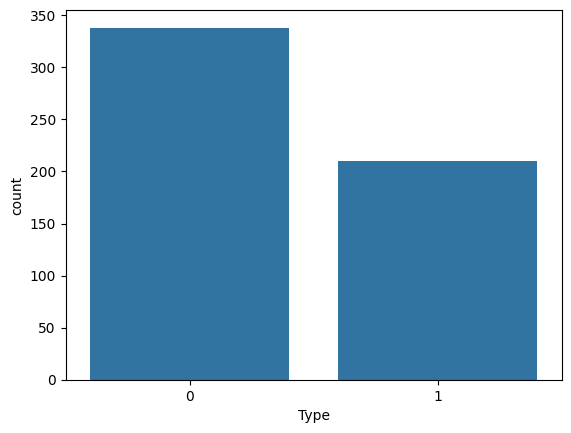

In [7]:
sbn.countplot(x="Type",data = dataFrame0)

<Axes: >

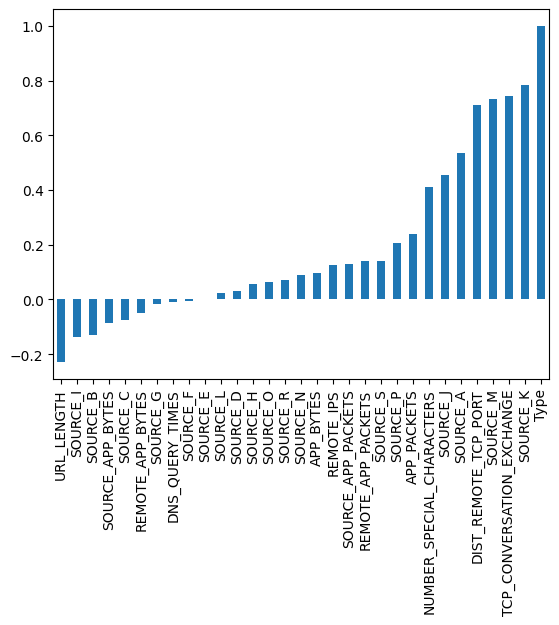

In [8]:
dataFrame0.corr()["Type"].sort_values().plot(kind="bar")

In [9]:
y = dataFrame0["Type"].values
x = dataFrame0.drop("Type",axis=1).values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(x_train)

MinMaxScaler()

In [15]:
x_train = scaler.transform(x_train)

In [16]:
x_test = scaler.transform(x_test)

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
x_train.shape

(367, 30)

In [19]:
model = Sequential()

model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [20]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data=(x_test,y_test),verbose=1)

Epoch 1/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.6905 - val_loss: 0.6873
Epoch 2/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6807 - val_loss: 0.6779
Epoch 3/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6635 - val_loss: 0.6686
Epoch 4/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6466 - val_loss: 0.6574
Epoch 5/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6302 - val_loss: 0.6398
Epoch 6/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5946 - val_loss: 0.6186
Epoch 7/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5539 - val_loss: 0.5930
Epoch 8/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5072 - val_loss: 0.5625
Epoch 9/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4867 - val_loss: 0.5362
Epoch 10/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4413 - val_loss: 0.5066
Epoch 11/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4118 - val_loss: 0.4620
Epoch 12/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 

In [21]:
model.history.history

{'loss': [0.6891869902610779,
  0.6777048110961914,
  0.6602236032485962,
  0.6386436223983765,
  0.6146379709243774,
  0.5833938121795654,
  0.5486738085746765,
  0.5121449828147888,
  0.4755902886390686,
  0.4379289150238037,
  0.4010234773159027,
  0.3609778881072998,
  0.3236304819583893,
  0.2905990183353424,
  0.2629993259906769,
  0.23782257735729218,
  0.21833522617816925,
  0.20247219502925873,
  0.1879170536994934,
  0.17821136116981506,
  0.16850748658180237,
  0.16177485883235931,
  0.15379250049591064,
  0.14645810425281525,
  0.14096641540527344,
  0.1415282040834427,
  0.14599500596523285,
  0.13589923083782196,
  0.12999327480793,
  0.1257469803094864,
  0.1226726695895195,
  0.11805115640163422,
  0.11588356643915176,
  0.11297565698623657,
  0.11230411380529404,
  0.10944237560033798,
  0.10647746175527573,
  0.1068410873413086,
  0.10247437655925751,
  0.10058960318565369,
  0.09784908592700958,
  0.09649500995874405,
  0.09632757306098938,
  0.09755674749612808,
  0

In [22]:
modelKaybi = pd.DataFrame(model.history.history)

<Axes: >

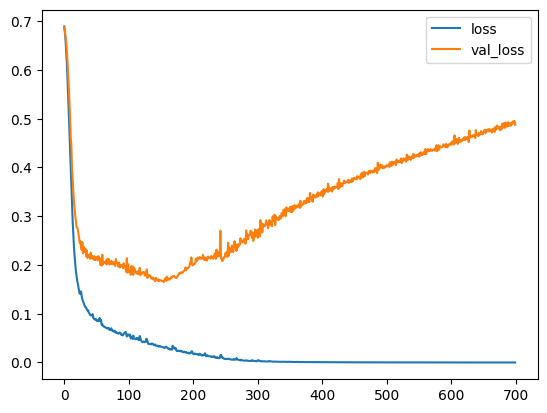

In [23]:
modelKaybi.plot()

In [24]:
model = Sequential()

model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [25]:
earlyStopping = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [26]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data = (x_test,y_test),verbose=1,callbacks=[earlyStopping])

Epoch 1/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.6932 - val_loss: 0.6840
Epoch 2/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6780 - val_loss: 0.6747
Epoch 3/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6610 - val_loss: 0.6614
Epoch 4/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6411 - val_loss: 0.6392
Epoch 5/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6165 - val_loss: 0.6105
Epoch 6/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5750 - val_loss: 0.5744
Epoch 7/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5223 - val_loss: 0.5223
Epoch 8/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4792 - val_loss: 0.4801
Epoch 9/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4079 - val_loss: 0.4443
Epoch 10/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3542 - val_loss: 0.3987
Epoch 11/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3104 - val_loss: 0.3717
Epoch 12/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 

In [27]:
modelKaybi = pd.DataFrame(model.history.history)

<Axes: >

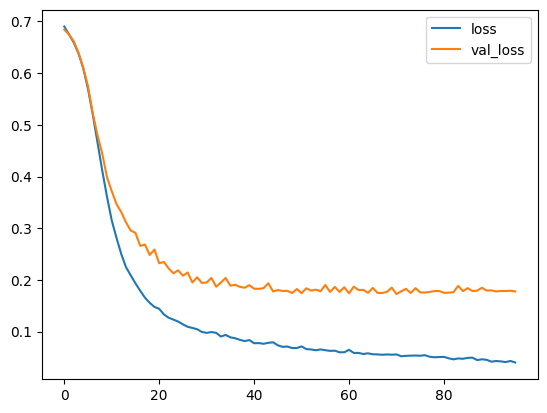

In [28]:
modelKaybi.plot()

In [29]:
model = Sequential()

model.add(Dense(units=30,activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [30]:
model.fit(x=x_train,y=y_train,epochs=700,validation_data = (x_test,y_test),verbose=1,callbacks=[earlyStopping])

Epoch 1/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.7186 - val_loss: 0.7010
Epoch 2/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7378 - val_loss: 0.6986
Epoch 3/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6991 - val_loss: 0.6978
Epoch 4/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7132 - val_loss: 0.6961
Epoch 5/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6755 - val_loss: 0.6944
Epoch 6/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6814 - val_loss: 0.6932
Epoch 7/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6827 - val_loss: 0.6921
Epoch 8/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6833 - val_loss: 0.6913
Epoch 9/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6825 - val_loss: 0.6902
Epoch 10/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6557 - val_loss: 0.6896
Epoch 11/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6671 - val_loss: 0.6882
Epoch 12/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

In [31]:
kayipDf = pd.DataFrame(model.history.history)

<Axes: >

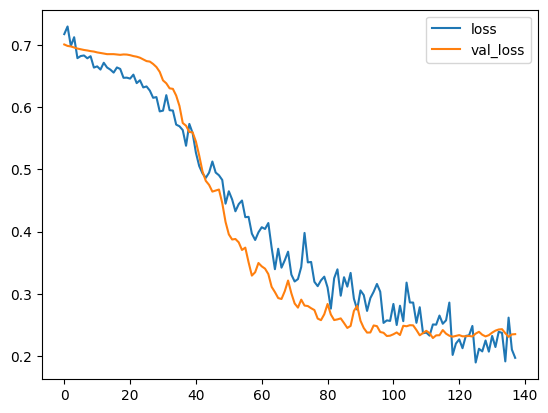

In [32]:
kayipDf.plot()

In [39]:
#tahminlerimiz = (model.predict(x_test) > 0.5).astype("int32")

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print(classification_report(y_test,tahminlerimiz))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       100
           1       0.91      0.88      0.89        81

    accuracy                           0.91       181
   macro avg       0.91      0.90      0.90       181
weighted avg       0.91      0.91      0.91       181



In [42]:
print(confusion_matrix(y_test,tahminlerimiz))

[[93  7]
 [10 71]]
